California cities: Fresno, Los Angeles, Oakland, San Diego, San Jose, San Francisco, Stockton

Oakland areas: Berkeley, Oakland, Piedmont, Albany, San Leandro, Alameda, Emeryville

In [49]:
# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.colors import ListedColormap
from datascience import *
import re
# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]
# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

In [45]:
oakland = gpd.read_file('holc_oakland')
oakland_areas = np.array([])
for i in oakland['area_descr']:
    try:
        area = re.findall(r'\"[A-Z][a-z]*', i)[0][1:]
        oakland_areas = np.append(oakland_areas, area)
    except:
        oakland_areas = np.append(oakland_areas, "Oakland")
oakland['area'] = oakland_areas
oakland.head()

,name,holc_id,holc_grade,area_descr,geometry,area
0,None,A,A,"{ """" : """" }",POLYGON ((-122.2025219245971 37.81098621368113...,Oakland
1,None,A1,A,"{ ""1"" : ""Berkeley Green A-1"", ""10a"" : ""fair"", ...","POLYGON ((-122.263194014919 37.9003948457167, ...",Berkeley
2,None,A10,A,"{ ""1"" : ""Oakland, California Low Green A-10"", ...",POLYGON ((-122.2340298202495 37.80670967378922...,Oakland
3,None,A11,A,"{ ""1"" : ""Oakland, California Green A-11"", ""10a...",POLYGON ((-122.2025219245971 37.81098621368113...,Oakland
4,None,A2,A,"{ ""1"" : ""Berkeley, California Green A-2"", ""10a...",POLYGON ((-122.2784713548339 37.89710197965462...,Berkeley


In [15]:
sf = gpd.read_file('holc_sf')
sf_areas = np.array([])
for i in sf['area_descr']:
    sf_areas = np.append(sf_areas, "San Francisco")
sf['area'] = sf_areas
sf.head()

,name,holc_id,holc_grade,area_descr,geometry,area
0,None,A1,A,"{ ""1"" : ""This area consists of 35 irregularly-...",POLYGON ((-122.4755427467677 37.78687046992896...,San Francisco
1,None,A10,A,"{ ""1"" : ""This area of 25 irregularly-shaped bl...","POLYGON ((-122.460892937571 37.73566041811658,...",San Francisco
2,None,A11,A,"{ ""1"" : ""This area, with the exception of the ...","POLYGON ((-122.4561948016356 37.7404562523725,...",San Francisco
3,None,A12,A,"{ ""1"" : ""This area, consisting of some 20 bloc...","POLYGON ((-122.471538045553 37.7332616246586, ...",San Francisco
4,None,A13,A,"{ ""1"" : ""This area of some 25 irregularly-shap...",POLYGON ((-122.4610177198522 37.73572244752883...,San Francisco


In [44]:
sj = gpd.read_file('holc_sj')
sj_areas = np.array([])
for i in sj['area_descr']:
    if re.findall('San Jose', city)[0] is not None:
        sj_areas = np.append(sj_areas, 'San Jose')
    elif re.findall('Santa Clara', city)[0] is not None:
        sj_areas = np.append(sj_areas, 'Santa Clara')
    else:
        sj_areas = np.append(sj_areas, 'San Jose')
sj['area'] = sj_areas
sj.head()


,name,holc_id,holc_grade,area_descr,geometry,area
0,None,A1,A,"{ ""10a"" : ""Good"", ""10b"" : ""6 room $75 (not man...",POLYGON ((-121.9204791953655 37.33682469345697...,San Jose
1,None,A2,A,"{ ""1"" : ""San Jose, California Green A-2"", ""10a...",POLYGON ((-121.8674110043605 37.33292300602364...,San Jose
2,None,B1,B,"{ ""1"" : ""Santa Clara, California Low Blue B-1""...",POLYGON ((-121.9517540446771 37.34729621897734...,San Jose
3,None,B2,B,"{ ""1"" : ""San Jose, California Blue B-2"", ""10a""...",POLYGON ((-121.9360282028903 37.34387692112275...,San Jose
4,None,B3,B,"{ ""1"" : ""San Jose, California High Blue B-3"", ...",(POLYGON ((-121.9270775807405 37.3269292945016...,San Jose


In [32]:
sd = gpd.read_file('holc_sd')
sd_areas = np.array([])
for i in sd['area_descr']:
    sd_areas = np.append(sd_areas, "San Diego")
sd['area'] = sd_areas
sd.head()

,name,holc_id,holc_grade,area_descr,geometry,area
0,Matton Bond District,A1,A,"{ ""1"" : ""Topography mostly level with some can...",POLYGON ((-117.2680626768443 32.84007283533988...,San Diego
1,East Balboa Park,A10,A,"{ ""1"" : ""Topography high and practically level...",POLYGON ((-117.1321690162445 32.74097487711254...,San Diego
2,Kennsington Heights,A11,A,"{ ""1"" : ""This area known as Kensington Heights...","POLYGON ((-117.1016402438276 32.7675030668039,...",San Diego
3,Talmadge Park,A12,A,"{ ""1"" : ""Topography, gentle canyons and mesa l...",POLYGON ((-117.0883662278446 32.76867583626845...,San Diego
4,Mattoon District,A13,A,"{ ""1"" : ""This is similar to A-12, but not quit...",POLYGON ((-117.0887537242273 32.76257841410184...,San Diego


In [34]:
la = gpd.read_file('holc_la')
la_areas = np.array([])
for i in la['area_descr']:
    la_areas = np.append(la_areas, "Los Angeles")
la['area'] = la_areas
la.head()

,name,holc_id,holc_grade,area_descr,geometry,area
0,None,A1,A,"{ ""0"" : ""Los Angeles County"", ""10"" : ""Caution:...",POLYGON ((-118.4574409245932 34.15201303915654...,Los Angeles
1,None,A10,A,"{ ""0"" : ""Los Angeles County"", ""10"" : """", ""1a"" ...","POLYGON ((-118.1115093215506 34.1831108636398,...",Los Angeles
2,None,A11,A,"{ ""0"" : ""Los Angeles County"", ""10"" : """", ""1a"" ...",POLYGON ((-118.1129997308115 34.15985120831089...,Los Angeles
3,None,A12,A,"{ ""0"" : ""Los Angeles County"", ""10"" : ""Caution:...",POLYGON ((-118.1712332409884 34.12776025045522...,Los Angeles
4,None,A13,A,"{ ""0"" : ""Los Angeles County"", ""10"" : ""Caution:...",(POLYGON ((-118.1745790360271 34.1419437871049...,Los Angeles


In [37]:
fresno = gpd.read_file('holc_fresno')
fresno_areas = np.array([])
for i in fresno['area_descr']:
    fresno_areas = np.append(fresno_areas, "Fresno")
fresno['area'] = fresno_areas
fresno.head()

,name,holc_id,holc_grade,area_descr,geometry,area
0,None,A1,A,"{ ""1"" : ""This is the best residential district...",POLYGON ((-119.8087060465236 36.77828861384437...,Fresno
1,None,A2,A,"{ ""1"" : ""This small area stands out definitely...",POLYGON ((-119.8045052951846 36.76401925580016...,Fresno
2,None,B1,B,"{ ""1"" : ""This is an area comprised entirely of...","POLYGON ((-119.8035478402121 36.7866168210399,...",Fresno
3,None,B2,B,"{ ""1"" : ""This area is a very good residential ...","POLYGON ((-119.8011141603769 36.7755078698128,...",Fresno
4,None,B3,B,"{ ""1"" : ""This area is a comparatively new sub-...",(POLYGON ((-119.7469251198323 36.7463072327567...,Fresno


In [41]:
stockton = gpd.read_file('holc_stockton')
stockton_areas = np.array([])
for i in stockton['area_descr']:
    stockton_areas = np.append(stockton_areas, "Stockton")
stockton['area'] = stockton_areas
stockton.head()

,name,holc_id,holc_grade,area_descr,geometry,area
0,Westmoor,A1,A,"{ ""1a"" : ""Level with no construction hazards. ...",POLYGON ((-121.3162101242384 37.97260027125117...,Stockton
1,"Oxford Manor, Avondale, Lake Park",A2,A,"{ ""1a"" : ""Level with no construction hazards. ...","POLYGON ((-121.302579344137 37.97344982969592,...",Stockton
2,"Lake View, Lake Park, and Park Terrace",A3,A,"{ ""1a"" : ""Level with no construction hazards. ...",POLYGON ((-121.3170123090073 37.95794173333558...,Stockton
3,Pacific Cardons and Tuxedo City Club Villa,B1,B,"{ ""1a"" : ""Level with no construction hazards. ...",POLYGON ((-121.3173749067852 37.97567265847668...,Stockton
4,Stockton Acres,B10,B,"{ ""1a"" : ""Level with no construction hazards. ...",POLYGON ((-121.3188128697049 37.95962121416519...,Stockton


In [46]:
california = oakland.append(sf).append(sj).append(sd).append(la).append(fresno).append(stockton)

In [47]:
# Final CA table
california.head()

,name,holc_id,holc_grade,area_descr,geometry,area
0,None,A,A,"{ """" : """" }",POLYGON ((-122.2025219245971 37.81098621368113...,Oakland
1,None,A1,A,"{ ""1"" : ""Berkeley Green A-1"", ""10a"" : ""fair"", ...","POLYGON ((-122.263194014919 37.9003948457167, ...",Berkeley
2,None,A10,A,"{ ""1"" : ""Oakland, California Low Green A-10"", ...",POLYGON ((-122.2340298202495 37.80670967378922...,Oakland
3,None,A11,A,"{ ""1"" : ""Oakland, California Green A-11"", ""10a...",POLYGON ((-122.2025219245971 37.81098621368113...,Oakland
4,None,A2,A,"{ ""1"" : ""Berkeley, California Green A-2"", ""10a...",POLYGON ((-122.2784713548339 37.89710197965462...,Berkeley


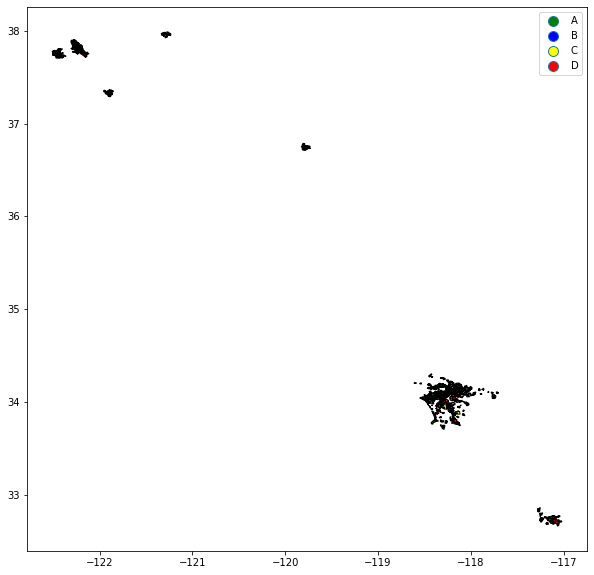

In [50]:
holc_cmap = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_colors')
california.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])

In [55]:
california.to_file('holc_ca.shp')

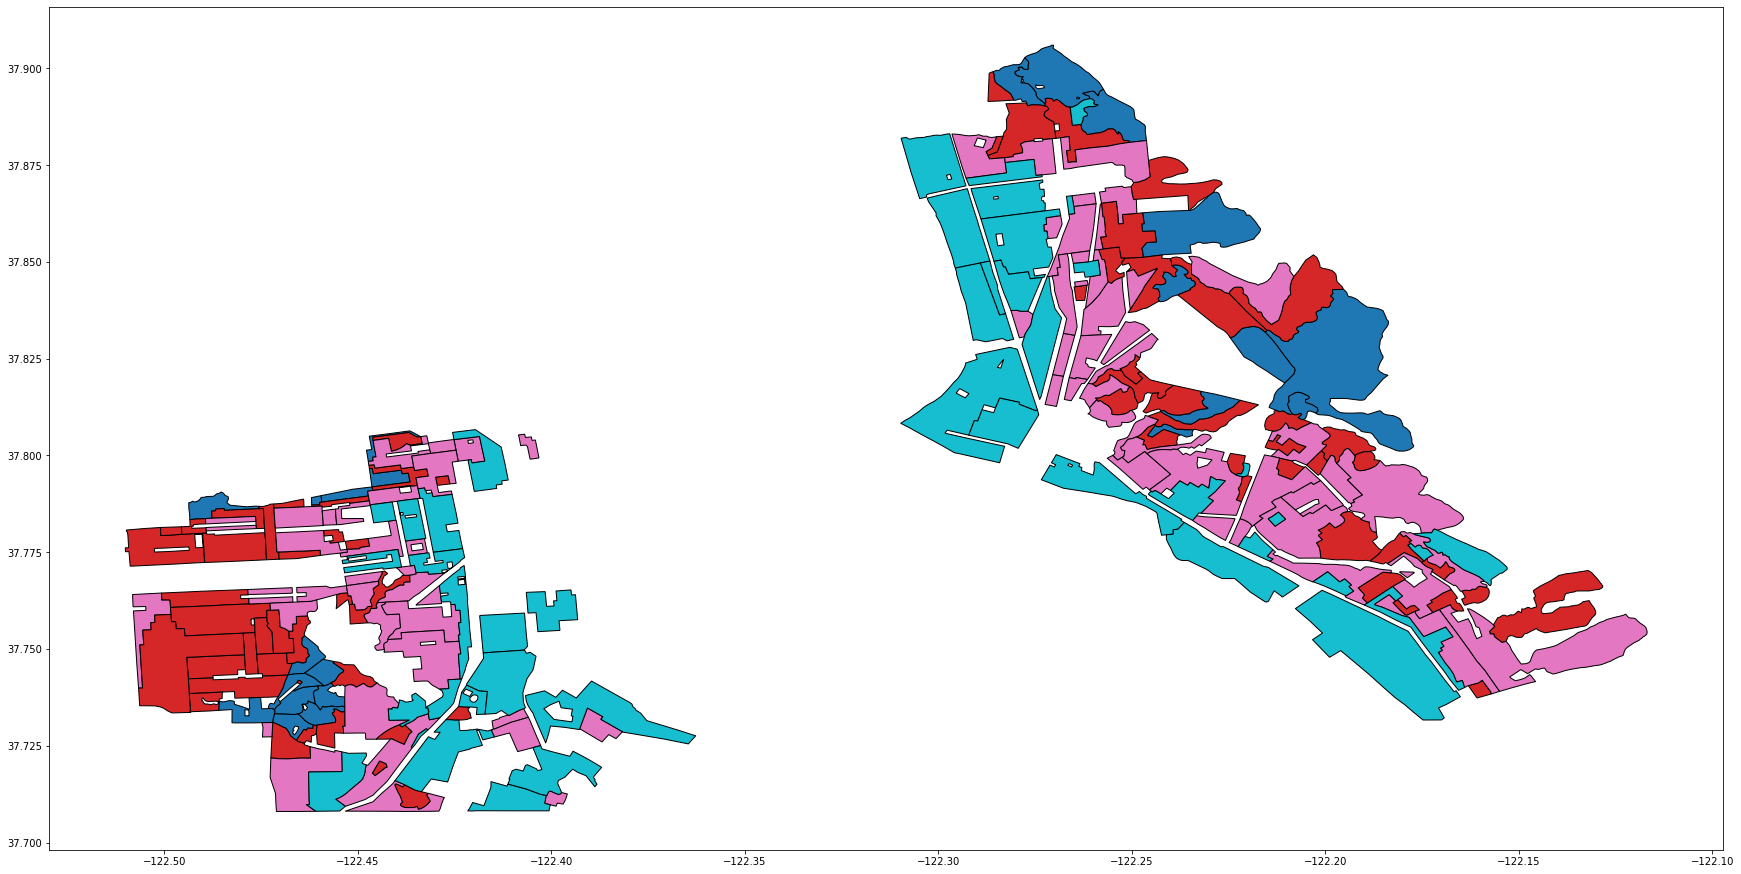

In [60]:
# How to graph chosen areas
california[california['area'].isin({'Oakland', 'Berkeley', 'Emeryville', 'San Francisco'})].plot(column = 'holc_grade')

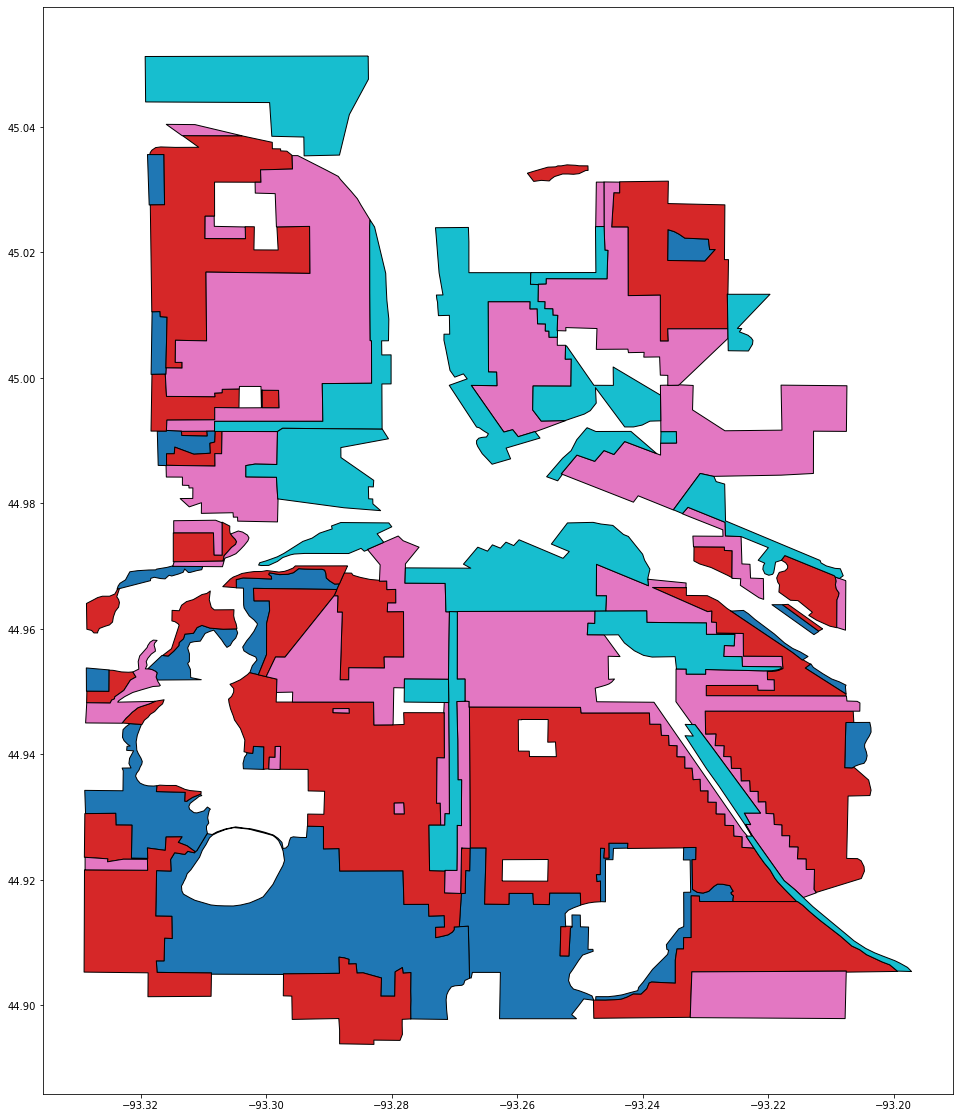

In [62]:
minneapolis = gpd.read_file('holc_minneapolis')
minneapolis.plot(column='holc_grade')